In [11]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')

resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [24]:
print("Negativa: \n")

resenha.loc[0, 'text_pt']

Negativa: 



'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [27]:
print("Positiva: \n")

resenha.loc[49002, 'text_pt']

Positiva: 



'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [29]:
resenha['sentiment'].value_counts(normalize=True) * 100

neg    50.071777
pos    49.928223
Name: sentiment, dtype: float64

A base de dados se encontra balanceada

In [30]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

resenha['classificacao'] = classificacao

resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
texto = ['Assisti um filme bom', 'Assisti um filme ruim']

vectorizer = CountVectorizer(lowercase=False)

bag_of_words = vectorizer.fit_transform(texto)

In [37]:
vectorizer.get_feature_names_out()

array(['Assisti', 'bom', 'filme', 'ruim', 'um'], dtype=object)

In [38]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [41]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

matriz_esparsa

,Assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


In [46]:
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(resenha['text_pt'])

In [47]:
bag_of_words.shape

(49459, 156923)

Grande e computacionalmente custoso/ineficiente

In [48]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(resenha['text_pt'])

In [49]:
bag_of_words.shape

(49459, 50)

In [50]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              resenha['classificacao'], 
                                                              random_state=42)

In [52]:
regressao_logistica = LogisticRegression()

In [53]:
regressao_logistica.fit(treino, classe_treino)

LogisticRegression()

In [54]:
regressao_logistica.score(teste, classe_teste)

0.6583097452486858

In [56]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(
        bag_of_words, 
        texto[coluna_classificacao], 
        random_state=42
    )
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)
    
    return acuracia

In [58]:
classificar_texto(resenha, "text_pt", "classificacao")

0.6583097452486858

In [59]:
bag_of_words.sum(axis=0)

matrix([[ 53719,  25563,  22150,  39511,  99840,  79061,  62047, 418565,
         101912,  41270,  22721,  50815,  28163, 133351,  24325,  21863,
          36162,  28385,  69975, 152842,  32150,  43071,  23599,  43923,
          56113,  66262,  21601,  53924,  44358,  57381, 131507,  74467,
          32903, 127115,  61672,  23224, 330177,  24146,  79844,  34046,
          40546,  28875,  36803,  34988,  20858,  25396,  24939, 217830,
         131190,  51010]], dtype=int64)

In [60]:
vectorizer.get_feature_names_out()

array(['Eu', 'ao', 'apenas', 'as', 'com', 'como', 'da', 'de', 'do', 'dos',
       'ela', 'ele', 'eles', 'em', 'era', 'esse', 'este', 'está', 'eu',
       'filme', 'filmes', 'foi', 'história', 'isso', 'mais', 'mas', 'me',
       'muito', 'na', 'no', 'não', 'os', 'ou', 'para', 'por', 'quando',
       'que', 'realmente', 'se', 'ser', 'seu', 'sobre', 'sua', 'são',
       'também', 'tem', 'tão', 'um', 'uma', 'você'], dtype=object)

In [61]:
from wordcloud import WordCloud

In [64]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

len(todas_palavras)

63448424

In [71]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

In [72]:
import matplotlib.pyplot as plt

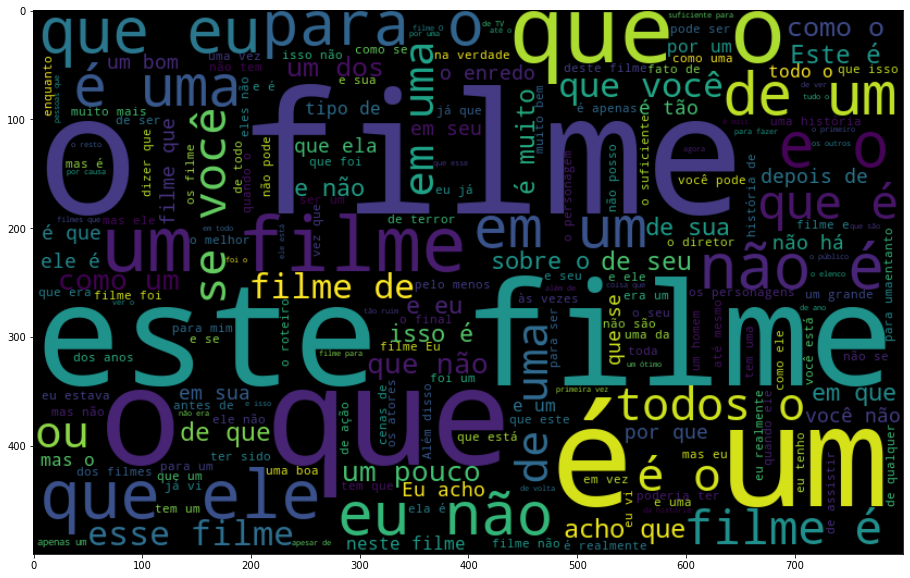

In [74]:
plt.figure(figsize=(18, 10))

plt.imshow(nuvem_palavras, interpolation='bilinear')

plt.show()

In [75]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_gra

[nltk_data]    |   Unzipping corpora\names.zip.
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swades

[nltk_data]    | Downloading package vader_lexicon to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package verbnet to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet.zip.
[nltk_data]    | Downloading package verbnet3 to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to C:\Users\Windows
[nltk_data]    |     10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Windows 10\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]   

True

In [76]:
from nltk import tokenize

In [77]:
frase = "Bem vindo ao mundo do PLN"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

In [78]:
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [79]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [80]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})

In [83]:
df_frequencia.sort_values(by='Frequência', ascending=False)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
...,...,...
202546,Delvian;,1
202548,Henson;,1
202549,FarScape,1
49483,Ghencea.,1


In [85]:
import seaborn as sns

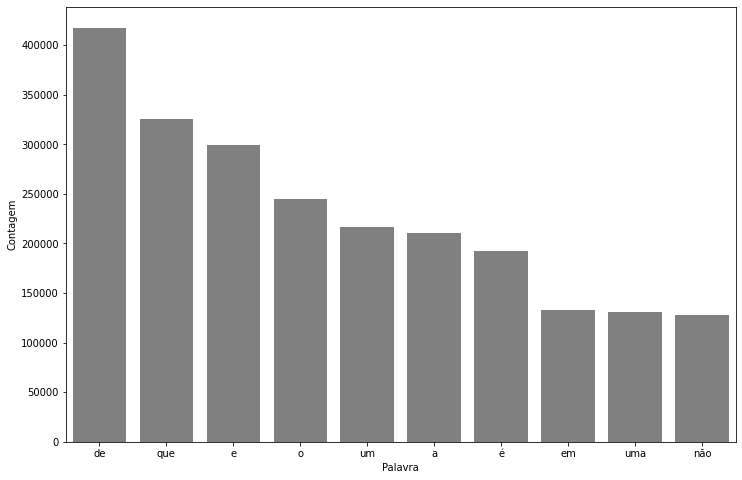

In [89]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_frequencia.nlargest(columns="Frequência", n=10), x="Palavra", y="Frequência", color="grey")

ax.set(ylabel="Contagem")

plt.show()